In [3]:
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageOps
from collections import Counter
import numpy as np
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import patches

fontprop = fm.FontProperties(fname='./NanumBarunGothic.ttf', size=18)

In [4]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

In [5]:
# json file 경로 설정
# data = read_json("/opt/ml/input/data/ICDAR17_Korean/ufo/train.json")
data = read_json("/opt/ml/input/data/camper/annotation.json")


# image 폴더 경로 설정
# path_imgs='/opt/ml/input/data/ICDAR17_Korean/images/'
path_imgs='/opt/ml/input/data/camper/images/'

In [6]:
dic_image=data['images']

### 사용법
1. start, end index 설정
2. 이미지, 라벨 확인
3. 검토 필요시 y
4. 검토 불필요시 n
5. y/n 이외의 키 입력시 종료

In [7]:
start_idx=0
end_idx=100

start check 14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG....
MAGNUM_EN_Horizontal
IN_EN_Horizontal
PARIS_EN_Horizontal
매그넘_KO_Horizontal
인_KO_Horizontal
파리_KO_Horizontal
MAGNUM_EN_Vertical
2019._Others_Horizontal
9._Others_Horizontal
25_Others_Horizontal
2020._Others_Horizontal
2._Others_Horizontal
9._Others_Horizontal
1418819488_Others_Horizontal
일반_KO_Horizontal
일반_KO_Horizontal
15,000원_Others_Horizontal
관람일시_Others_Horizontal
2019년_Others_Horizontal
11월_Others_Horizontal
02일(토)_Others_Horizontal
11:00_Others_Horizontal
입장권_Others_Horizontal
TICKET_EN_Horizontal
IN_EN_Horizontal
_EN_Horizontal
PARIS_EN_Horizontal
2019/11/02_EN_Horizontal
현장_KO_Horizontal
신용카드_KO_Horizontal
33217893_KO_Horizontal
20191102-t11823-1-168_KO_Horizontal
(1/1)_KO_Horizontal
2019/11/02_KO_Horizontal
13:50:46_KO_Horizontal
앙리_KO_Horizontal
카르티에_KO_Horizontal
브레송_KO_Horizontal
파리_KO_Horizontal
Special_EN_Horizontal
Exhibition_EN_Horizontal
한가람디자인미술관_EN_Horizontal
예술의전당_EN_Horizontal


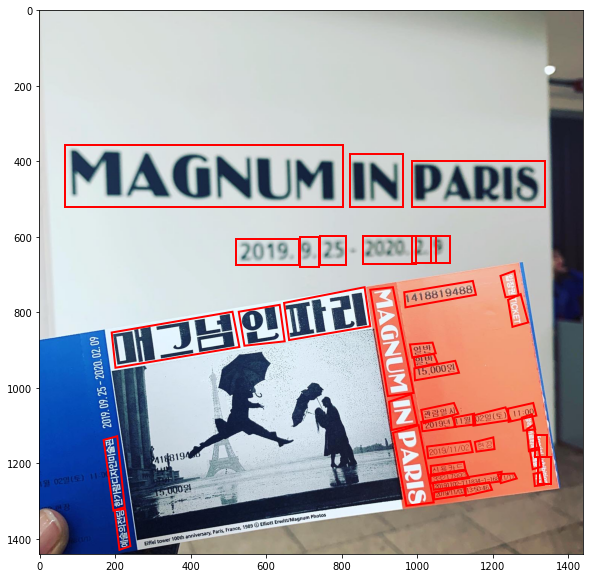

Index : 0 // 검토필요 목록 추가(y/n): adsf


Stop Check


In [8]:
check_list=[]
list_img=list(dic_image.keys())

for idx, path_img in enumerate(list_img[start_idx:end_idx]):
    print(f'start check {path_img}....')
    # command = input("continue?(y/n):")
    # if command == 'n':
    #     break
    img=Image.open(f"{path_imgs}{path_img}")
    img = ImageOps.exif_transpose(img)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img)


    for i in dic_image[path_img]['words']:
        dic_img=dic_image[path_img]['words'][i]
        ax.add_patch(
            patches.Polygon(
                dic_img['points'],
                fill=False,
                color='r',
                linewidth=2
            ),
        )
        if dic_img['language'] == None:
            img_trans="None"
        else:
            img_lang = dic_img['language'][-1]
            
        dix_img_text=dic_img['transcription']+'_'+img_lang+'_'+dic_img['orientation']
        print(dix_img_text)
        # ax.text(dic_img['points'][0][0],
        #         dic_img['points'][0][1],
        #         dix_img_text,
        #         fontproperties=fontprop,
        #         color='b',)
    plt.show()
    
    isCorrect = input(f"Index : {start_idx + idx} // 검토필요 목록 추가(y/n):")
    if isCorrect == 'y':
        check_list.append(path_img)
        print("check list 추가")
        continue
    elif isCorrect == 'n':
        continue
    else:
        break
print("="*30)
print("Stop Check")

In [23]:
check_list

['1632643837411-12.jpg', '1632644162889-2.jpg', '1632655330045-21.jpg']